本文档用于展示各个因子的效果，方便在后续的研究中快速进行比较

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import jqdatasdk as jqdata
from tqdm import tqdm
import sqlite3
from abc import abstractmethod
import datetime
import itertools

In [2]:
from const import *   # import the const.
from classes.basic_calculator import STOCK_LIST, TRADE_DATE_LIST
from classes.basic_functions import DateCalculator, index_columns_check
from classes.data_downloader import DailyPriceDataDownloader, DailyValuationDataDownloader, DailyFinancialDataDownloader, CertainEquityDataDownloader
from classes.data_reader import DailyPriceDataReader, DailyValuationDataReader, DailyFinancialDataReader, CertainEquityDataReader, CrossPriceDataReader, FactorsDataReader
from classes.factor_calcualtor import FactorCalculatorTemplate, FscoreCalculator
from classes.factor_constructor import FactorConstructorTemplate, FscoreConstructor, FactorsInitializer

from classes.data_constructor import CrossDataInitializer
from classes.signal_generator import SignalGeneratorTemplate, DoubleGenerator
from classes.back_tester import BackTesterTemplate, SimpleBackTester, CompletedBackTester, get_IC
from classes.signal_transfer import SignalTransferTemplate, MonthlyLastSignalTransfer, WeeklyLastFactorTransfer

auth success 


# 数据读取

In [3]:
price_reader = CrossPriceDataReader()
open_price = price_reader.read_open()

factors_reader = FactorsDataReader()

### Fscore测试

In [3]:
# read data and get signal
df_fscore = factors_reader.get_fscores()

signal_generator = SignalGeneratorTemplate()
df_signal = signal_generator.get_signal(df_fscore)

#### Fscore无滑点和手续费测试

100%|██████████| 6/6 [00:02<00:00,  2.31it/s]


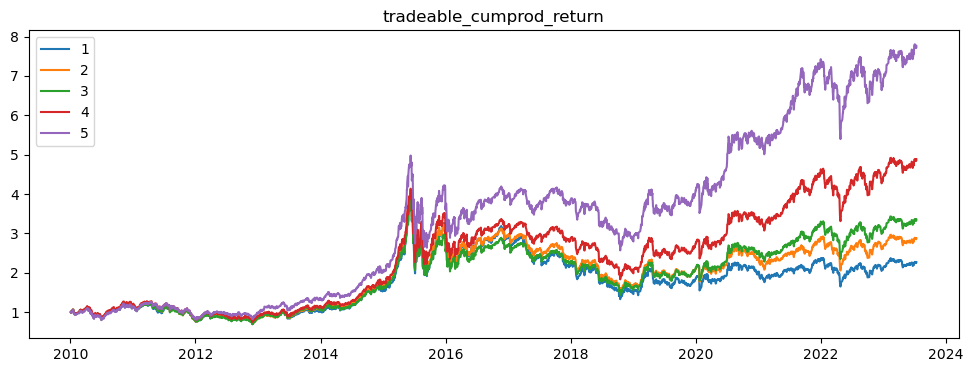

In [4]:
fscore_simple_tester = SimpleBackTester(open_df=open_price, singnal_df=df_signal)
fscore_simple_tester.get_tradable_return_plot()

In [5]:
fscore_simple_tester.get_all_indicators()

,0,1,2,3,4,5
max_drawdown,0.761354,0.650029,0.624514,0.626271,0.556302,0.483696
yearly_return,2.870463,0.103983,0.119573,0.130235,0.158429,0.193330
sharp,0.337008,0.022991,0.027220,0.030022,0.036717,0.044996
calmar,0.015081,0.000640,0.000766,0.000832,0.001139,0.001599


#### Fscore带滑点和手续费测试

100%|██████████| 6/6 [01:21<00:00, 13.58s/it]


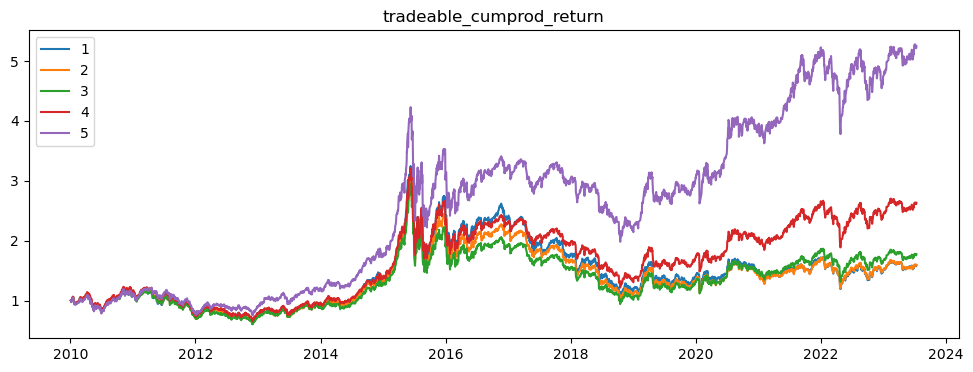

In [6]:
fscore_completed_tester = CompletedBackTester(open_df=open_price, singnal_df=df_signal)
fscore_completed_tester.get_tradable_return_plot()

In [7]:
fscore_completed_tester.get_all_indicators()

,0,1,2,3,4,5
max_drawdown,0.775482,0.677491,0.674358,0.680468,0.619745,0.531070
yearly_return,2.850907,0.076935,0.074848,0.081842,0.111439,0.163576
sharp,0.334604,0.017006,0.017032,0.018859,0.025819,0.038065
calmar,0.014705,0.000454,0.000444,0.000481,0.000719,0.001232


### Reversal效果测试

In [12]:
df_reversal = factors_reader.get_reversals()

reversal_signal_generator = SignalGeneratorTemplate()
reversal_df_signal = reversal_signal_generator.get_signal(df_reversal)

In [15]:
df_reversal.rank(ascending=True)

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,688787.XSHG,688788.XSHG,688789.XSHG,688793.XSHG,688798.XSHG,688799.XSHG,688800.XSHG,688819.XSHG,688981.XSHG,689009.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-10,1161.0,926.0,3039.0,147.0,1264.0,181.0,2147.0,2276.0,1088.0,1529.0,...,89.0,232.0,156.0,372.0,319.0,320.0,303.0,476.0,27.0,448.0
2023-07-11,1030.0,907.0,3181.0,139.0,1392.0,222.0,2152.0,2424.0,1146.0,1690.0,...,141.0,284.0,200.0,382.0,353.0,361.0,313.0,484.0,41.0,453.0
2023-07-12,1187.0,855.0,3143.0,66.0,1215.0,232.0,1963.0,2305.0,920.0,1509.0,...,119.0,288.0,198.0,379.0,348.0,271.0,289.0,474.0,48.0,362.0


In [17]:
reversal_df_signal.iloc[-5:, :]

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,688787.XSHG,688788.XSHG,688789.XSHG,688793.XSHG,688798.XSHG,688799.XSHG,688800.XSHG,688819.XSHG,688981.XSHG,689009.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2023-07-10,2,2,5,1,2,1,3,4,2,2,...,1,1,1,5,3,4,4,5,1,4
2023-07-11,1,1,5,1,2,1,3,4,2,2,...,1,1,1,4,4,4,4,5,1,3
2023-07-12,2,1,5,1,2,1,3,4,1,2,...,1,1,1,5,4,3,4,5,1,3
2023-07-13,2,1,5,1,2,1,3,4,2,2,...,1,1,1,4,3,3,4,5,1,4
2023-07-14,2,1,5,1,2,2,3,4,1,2,...,1,1,1,4,3,3,3,5,1,3


#### reversal无手续费和滑点测试

100%|██████████| 6/6 [00:02<00:00,  2.18it/s]


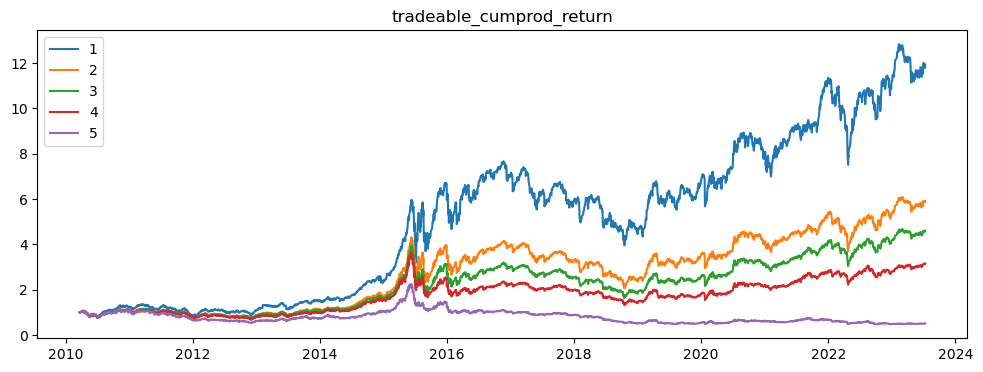

In [18]:
reversal_simple_tester = SimpleBackTester(open_df=open_price, singnal_df=reversal_df_signal)
reversal_simple_tester.get_tradable_return_plot()

In [13]:
reversal_simple_tester.get_all_indicators()

,0,1,2,3,4,5
max_drawdown,0.685647,0.483981,0.523809,0.590344,0.637450,0.788250
yearly_return,2.352066,0.238420,0.178266,0.157312,0.126111,-0.010851
sharp,0.299181,0.049565,0.039670,0.035760,0.029352,-0.002393
calmar,0.013722,0.001970,0.001361,0.001066,0.000791,-0.000055


#### reversal带手续费和滑点测试

100%|██████████| 6/6 [01:19<00:00, 13.28s/it]


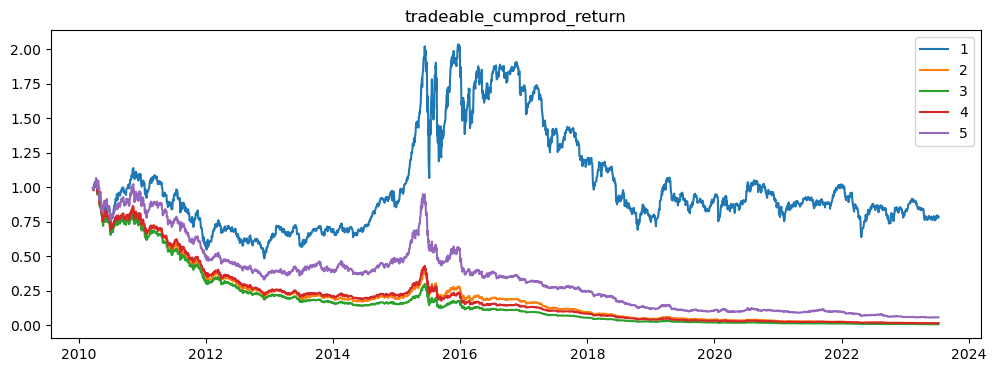

In [14]:
reversal_completed_tester = CompletedBackTester(open_df=open_price, singnal_df=reversal_df_signal)
reversal_completed_tester.get_tradable_return_plot()

In [15]:
reversal_completed_tester.get_all_indicators()

,0,1,2,3,4,5
max_drawdown,0.699186,0.686360,0.986423,0.993739,0.987101,0.948781
yearly_return,2.334428,0.028272,-0.287349,-0.348854,-0.293177,-0.180597
sharp,0.296844,0.005879,-0.063983,-0.079330,-0.068229,-0.039814
calmar,0.013355,0.000165,-0.001165,-0.001404,-0.001188,-0.000761


### valuation因子

In [5]:
df_valuation = factors_reader.get_valuations()

valuation_signal_generator = SignalGeneratorTemplate()
valuation_df_signal = valuation_signal_generator.get_signal(df_valuation)

#### valuation无手续费和滑点测试

100%|██████████| 6/6 [00:02<00:00,  2.26it/s]


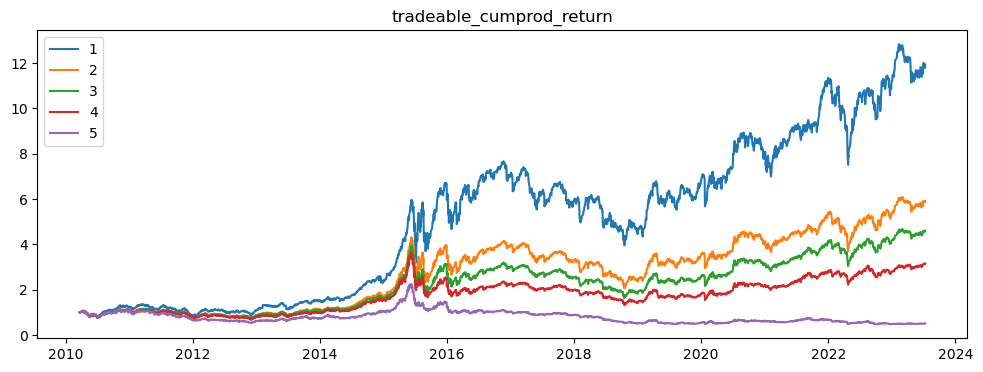

In [6]:
valuation_simple_tester = SimpleBackTester(open_df=open_price, singnal_df=valuation_df_signal)
valuation_simple_tester.get_tradable_return_plot()

In [18]:
valuation_simple_tester.get_all_indicators()

,0,1,2,3,4,5
max_drawdown,0.685647,0.483981,0.523809,0.590344,0.637450,0.788250
yearly_return,2.352066,0.238420,0.178266,0.157312,0.126111,-0.010851
sharp,0.299181,0.049565,0.039670,0.035760,0.029352,-0.002393
calmar,0.013722,0.001970,0.001361,0.001066,0.000791,-0.000055


#### valuation带手续费和滑点测试

100%|██████████| 6/6 [01:22<00:00, 13.71s/it]


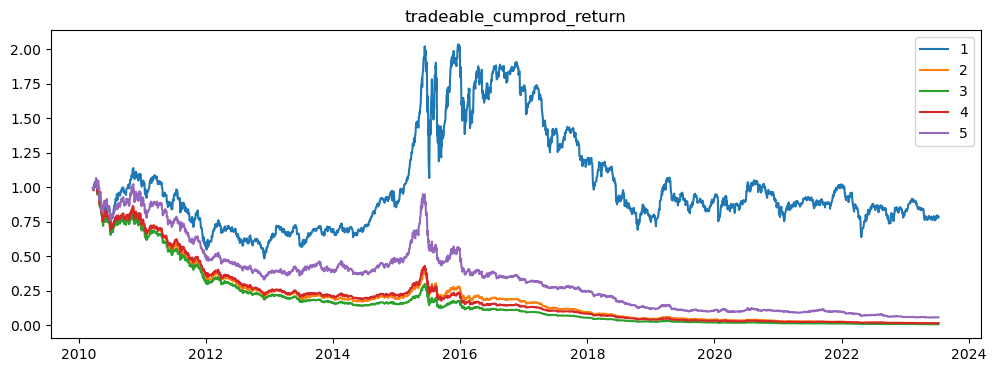

In [7]:
valuation_completed_tester = CompletedBackTester(open_df=open_price, singnal_df=valuation_df_signal)
valuation_completed_tester.get_tradable_return_plot()

In [8]:
valuation_completed_tester.get_all_indicators()

,0,1,2,3,4,5
max_drawdown,0.699186,0.686360,0.986423,0.993739,0.987101,0.948781
yearly_return,2.334428,0.028272,-0.287349,-0.348854,-0.293177,-0.180597
sharp,0.296844,0.005879,-0.063983,-0.079330,-0.068229,-0.039814
calmar,0.013355,0.000165,-0.001165,-0.001404,-0.001188,-0.000761


### 双重排序：带手续费和滑点

In [3]:
# read data
factors_reader = FactorsDataReader()
df_fscore = factors_reader.get_fscores()
df_reversals = factors_reader.get_reversals()

price_reader = CrossPriceDataReader()
df_open = price_reader.read_open()

100%|██████████| 36/36 [07:58<00:00, 13.29s/it]


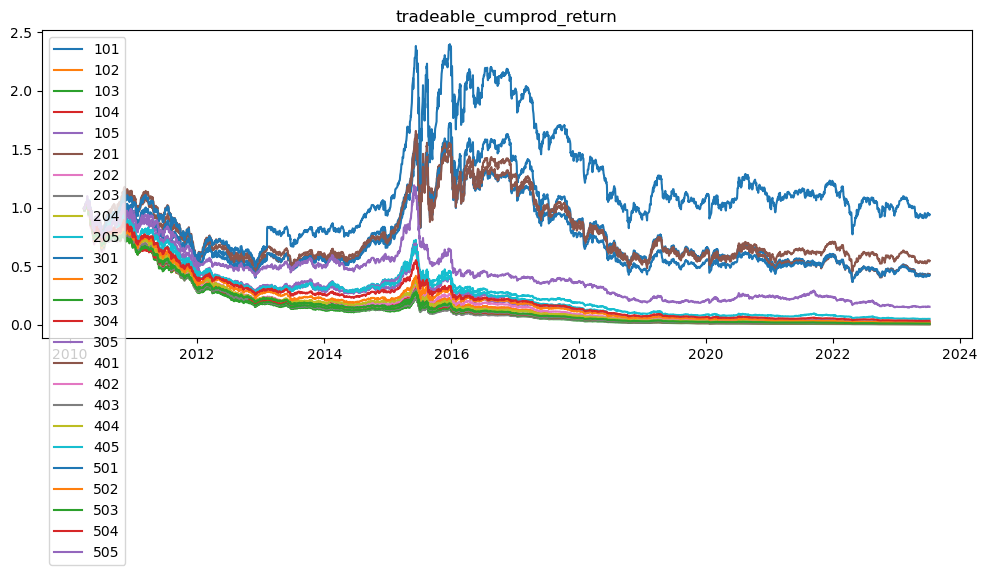

In [4]:
double_ranker = DoubleGenerator()
independent_signal = double_ranker.get_signal_independent(df_factor_1=df_fscore, df_factor_2=df_reversals)
independent_simple_bact_tester = CompletedBackTester(open_df=df_open, singnal_df=independent_signal)
independent_simple_bact_tester.get_tradable_return_plot()

100%|██████████| 31/31 [09:28<00:00, 18.33s/it]


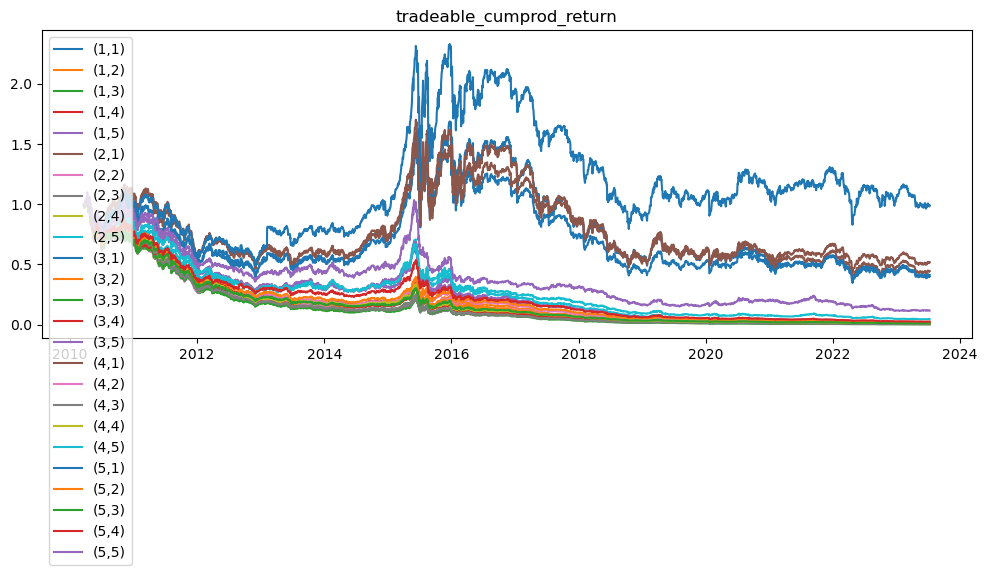

In [6]:
dependent_signal = double_ranker.get_signal_dependent(df_factor_first=df_fscore, df_factor_second=df_reversals)
dependent_simple_bact_tester = CompletedBackTester(open_df=df_open, singnal_df=dependent_signal)
dependent_simple_bact_tester.get_tradable_return_plot()

在非独立双重排序中，五组fscoer加起来远低于fscore因子的第五组：手续费和滑点吃掉了利润 ——> 下降调仓频率
1. 月度测试
2. 周度测试

In [8]:
signal_transfer = MonthlyLastSignalTransfer()
df_signal_month = signal_transfer.signal_transfering(df_signal=independent_signal)

100%|██████████| 36/36 [07:32<00:00, 12.56s/it]


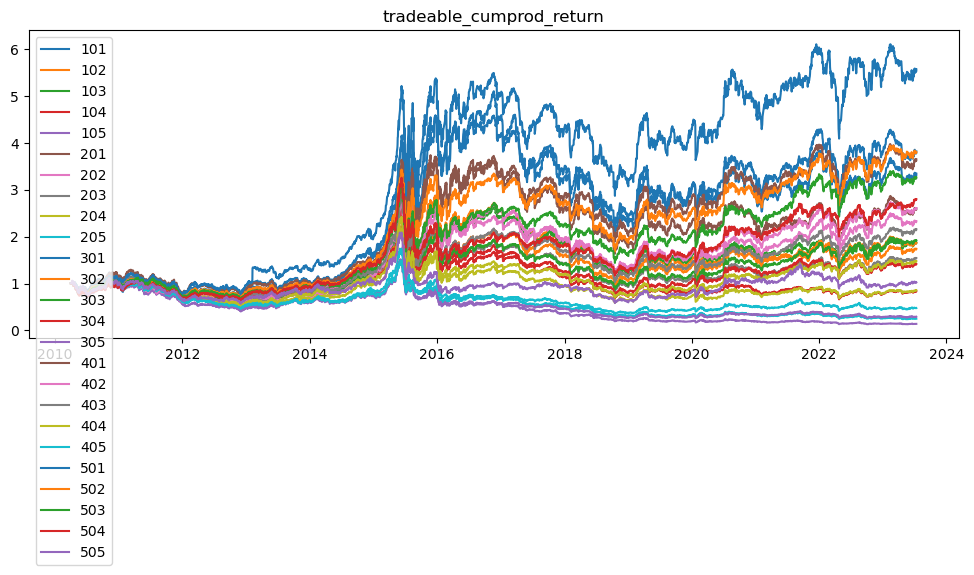

In [9]:
independent_simple_bact_tester = CompletedBackTester(open_df=df_open, singnal_df=df_signal_month)
independent_simple_bact_tester.get_tradable_return_plot()

In [5]:
# double_ranker = DoubleGenerator()
# independent_signal = double_ranker.get_signal_independent(df_factor_1=df_fscore, df_factor_2=df_reversals)

signal_transfer = WeeklyLastFactorTransfer()
df_signal_week = signal_transfer.signal_transfering(df_signal=independent_signal)

100%|██████████| 36/36 [07:28<00:00, 12.47s/it]


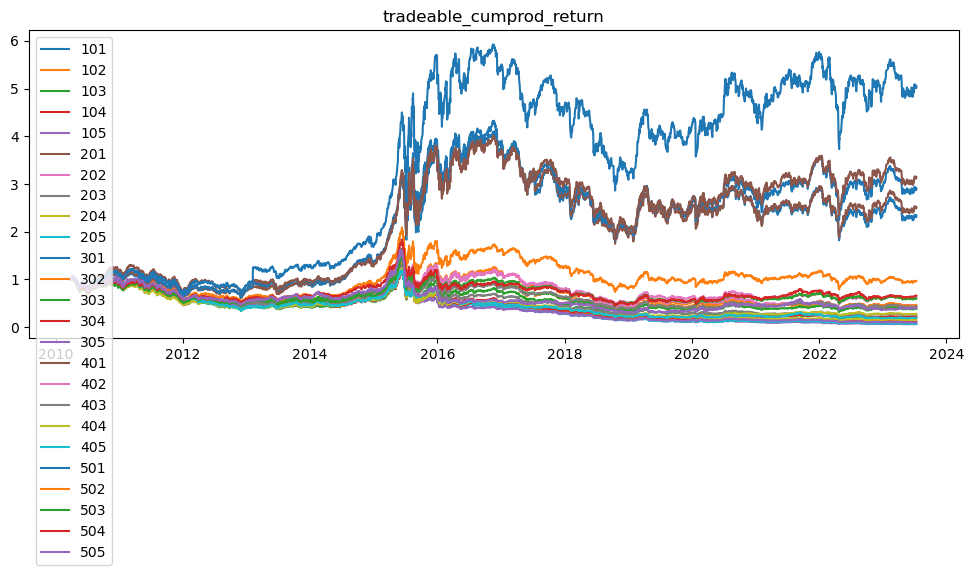

In [6]:
independent_simple_bact_tester = CompletedBackTester(open_df=df_open, singnal_df=df_signal_week)
independent_simple_bact_tester.get_tradable_return_plot()